In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
import warnings
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [54]:
df_orginal = pd.read_excel('Week1_challenge_data_source.xlsx',dtype={'Bearer Id':str},engine='openpyxl')

In [55]:
print(df.shape)
df.head()

(150001, 55)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [56]:
df=df_orginal.copy(deep=True)

In [85]:
df_orginal

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,2019-04-29 07:28:41,615.0,2019-04-30 00:01:49,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277826e+18,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [57]:
all_cols=df.columns.to_list()

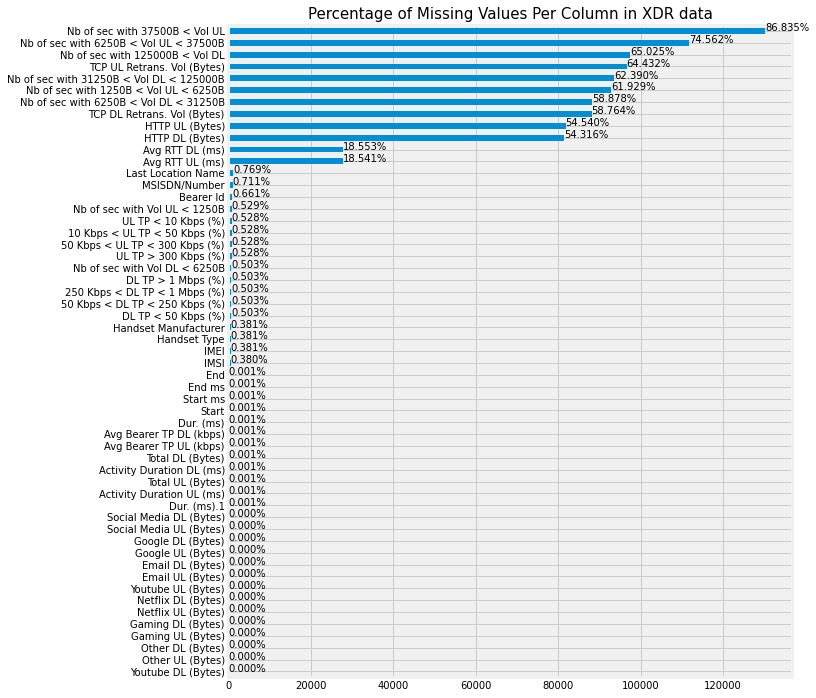

In [59]:
# Check the percentage of missing values in every column
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 12))
plt.title('Percentage of Missing Values Per Column in XDR data', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.3f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [60]:
def removeMissingvalues(df:pd.DataFrame)-> pd.DataFrame:
    missing_ratio = df.isna().sum()/df.shape[0]

    # Below code gives list of columns having more than 25% nan
    col_to_drop = missing_ratio[missing_ratio>0.25].keys()

    df.drop(col_to_drop, axis=1,inplace=True)
    
    return df

In [61]:
df=removeMissingvalues(df)

In [81]:
df.dropna(axis=0,subset=['Bearer Id'],inplace=True)

In [82]:
df.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  9
MSISDN/Number                       504
IMEI                                 11
Last Location Name                  162
Avg RTT DL (ms)                   27685
Avg RTT UL (ms)                   27666
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 716
50 Kbps < DL TP < 250 Kbps (%)      716
250 Kbps < DL TP < 1 Mbps (%)       716
DL TP > 1 Mbps (%)                  716
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                770
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [86]:
df.shape

(149010, 45)

In [70]:
# df['Bearer Id']=pd.to_numeric(df['Bearer Id'], errors='coerce')

** Drop Duplicates

In [128]:
df[df.duplicated(subset=['Bearer Id','IMSI','IMEI'],keep='first')].sort_values(by='Bearer Id')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
129045,6.917538e+18,2019-04-28 09:05:08,915.0,2019-04-30 06:42:43,441.0,164254.0,2.082017e+14,3.368571e+10,3.520031e+13,G00506A,...,1137115.0,13352727.0,23005157.0,20133275.0,309348950.0,1931808.0,561395720.0,3998914.0,43435127.0,337110273.0
11289,6.917538e+18,2019-04-24 17:24:21,553.0,2019-04-25 00:02:15,742.0,23874.0,2.082003e+14,3.376191e+10,3.587081e+13,G14011B,...,8354289.0,347979.0,21623759.0,1168596.0,54022681.0,1515327.0,348398039.0,10483610.0,13986433.0,99074779.0
20752,6.917538e+18,2019-04-24 20:13:11,736.0,2019-04-24 23:37:58,245.0,12286.0,2.082018e+14,3.367318e+10,3.552571e+13,G72007C,...,19799048.0,8914337.0,13399050.0,11000353.0,12452070.0,4151786.0,531385806.0,3004285.0,28070049.0,59698922.0
20793,6.917538e+18,2019-04-24 20:13:37,395.0,2019-04-25 01:03:36,555.0,17399.0,2.082010e+14,3.377052e+10,3.553281e+13,G94036C,...,23220707.0,14703668.0,882674.0,4529240.0,345294859.0,16457041.0,59694372.0,7444417.0,43737685.0,373639184.0
20734,6.917538e+18,2019-04-24 20:13:03,249.0,2019-04-25 03:13:01,382.0,25198.0,2.082017e+14,3.366639e+10,3.553281e+13,C42873C,...,7488004.0,21577909.0,11703832.0,6054267.0,45221967.0,9746902.0,726500050.0,3830129.0,42636247.0,66381138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126541,1.311448e+19,2019-04-27 10:25:09,764.0,2019-04-30 10:25:17,370.0,259207.0,2.082017e+14,3.361638e+10,3.554481e+13,L42161C,...,8919497.0,3836431.0,22927969.0,7888310.0,796847282.0,13749263.0,401308609.0,2977413.0,32969302.0,837073433.0
129668,1.311448e+19,2019-04-28 10:25:13,603.0,2019-04-30 10:25:17,370.0,172803.0,2.082017e+14,3.361638e+10,3.554481e+13,L42161C,...,18597695.0,8047646.0,12360623.0,18047180.0,92847168.0,3422474.0,367579311.0,14331743.0,47358488.0,136862336.0
115498,1.311448e+19,2019-04-28 00:58:06,495.0,2019-04-29 13:32:20,528.0,131654.0,2.082003e+14,3.376185e+10,3.546631e+13,T42009B,...,12172275.0,6238726.0,2314397.0,16952221.0,454594537.0,12355794.0,463398954.0,1190352.0,38265556.0,483053378.0
130662,1.311448e+19,2019-04-28 11:58:50,272.0,2019-04-30 11:56:14,148.0,172643.0,2.082010e+14,3.365841e+10,8.607820e+13,L88742C,...,449124.0,14162804.0,3806555.0,20018696.0,207826400.0,593330.0,237555684.0,8307774.0,46966568.0,218180556.0
